In [1]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/sierraleone-bumbuna.csv")

# Summary statistics for all numeric columns
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [3]:
# Missing values per column
missing = df.isna().sum()
missing[missing > 0]

# Columns with >5% missing
threshold = len(df) * 0.05
missing[missing > threshold]

Comments    525600
dtype: int64

In [4]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Z-scores
z_scores = df[key_cols].apply(zscore)

# Flag rows with outliers (|Z| > 3)
outliers = (np.abs(z_scores) > 3)
df['outlier'] = outliers.any(axis=1)

# Median imputation for missing values
df[key_cols] = df[key_cols].apply(lambda x: x.fillna(x.median()))

# Drop remaining rows with any NaNs (optional)
# df = df.dropna()

# Export cleaned data
df.to_csv("../data/sierraleone_clean.csv", index=False)

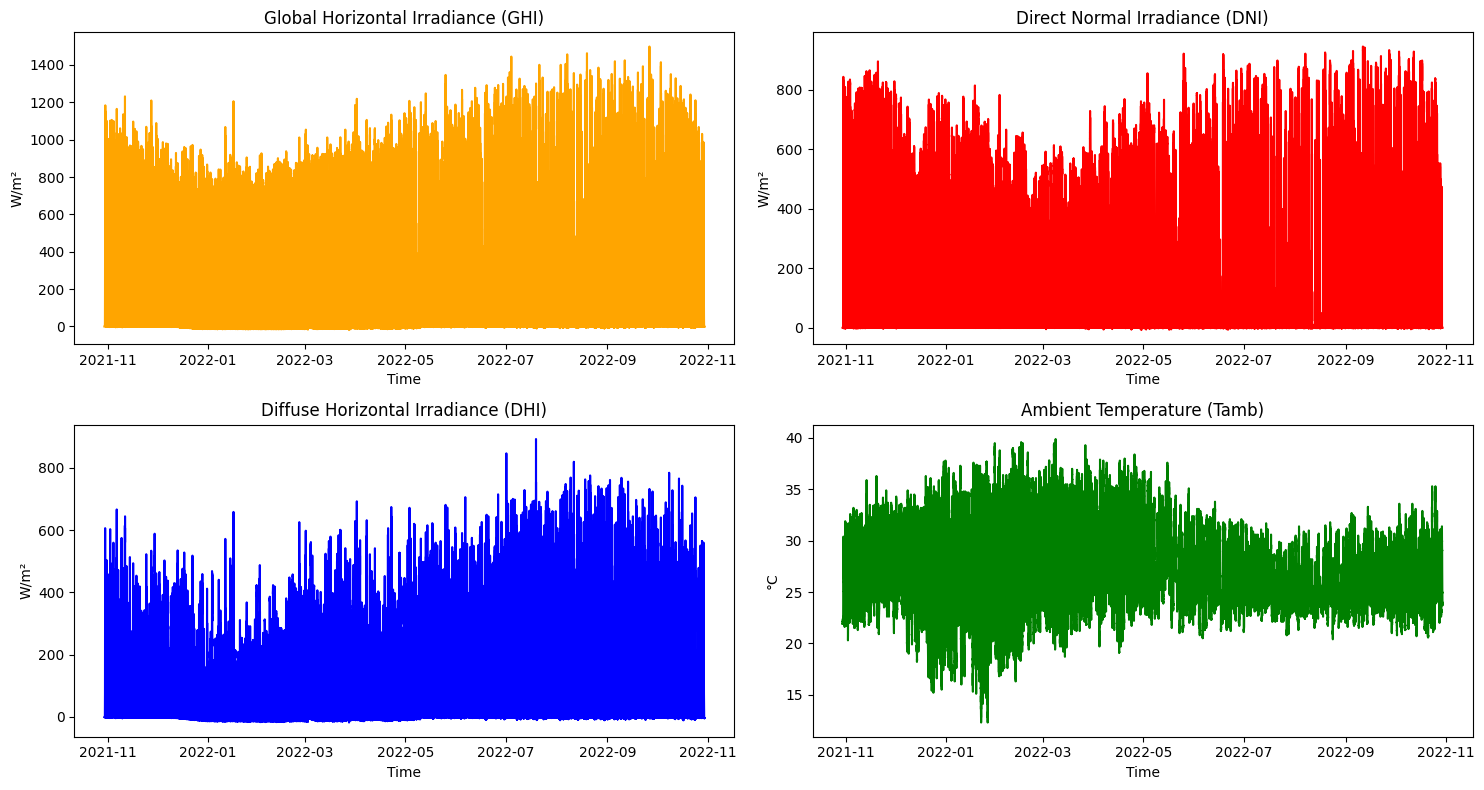

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(df['Timestamp'], df['GHI'], label='GHI', color='orange')
plt.title('Global Horizontal Irradiance (GHI)')
plt.xlabel('Time')
plt.ylabel('W/m²')

plt.subplot(2, 2, 2)
plt.plot(df['Timestamp'], df['DNI'], label='DNI', color='red')
plt.title('Direct Normal Irradiance (DNI)')
plt.xlabel('Time')
plt.ylabel('W/m²')

plt.subplot(2, 2, 3)
plt.plot(df['Timestamp'], df['DHI'], label='DHI', color='blue')
plt.title('Diffuse Horizontal Irradiance (DHI)')
plt.xlabel('Time')
plt.ylabel('W/m²')

plt.subplot(2, 2, 4)
plt.plot(df['Timestamp'], df['Tamb'], label='Ambient Temp (Tamb)', color='green')
plt.title('Ambient Temperature (Tamb)')
plt.xlabel('Time')
plt.ylabel('°C')

plt.tight_layout()
plt.show()


In [6]:
# Assume outliers = dirty, non-outliers = clean
df['Cleaned'] = ~df['outlier']  # Invert to say outlier=False → cleaned=True

['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments', 'outlier', 'Cleaned']


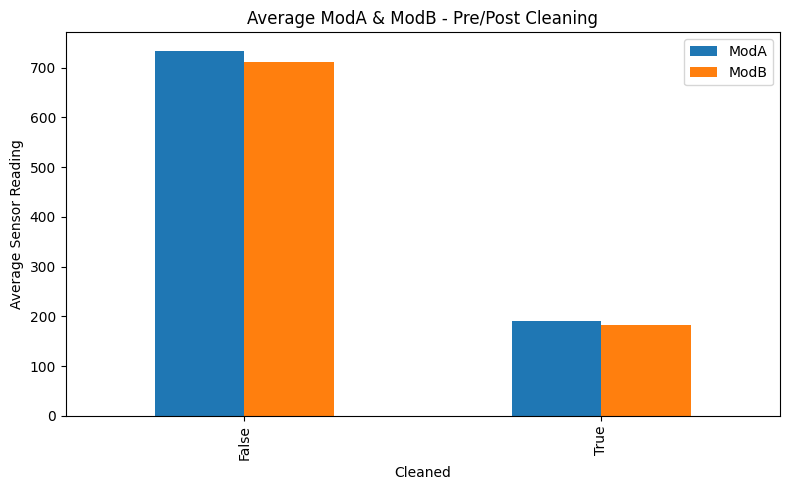

In [7]:
# Ensure 'Cleaned' or equivalent column exists
print(df.columns.tolist())

# Group and plot
cleaning_avg = df.groupby('Cleaned')[['ModA', 'ModB']].mean().reset_index()

cleaning_avg.plot(kind='bar', x='Cleaned', figsize=(8, 5), title='Average ModA & ModB - Pre/Post Cleaning')
plt.ylabel("Average Sensor Reading")
plt.tight_layout()
plt.show()

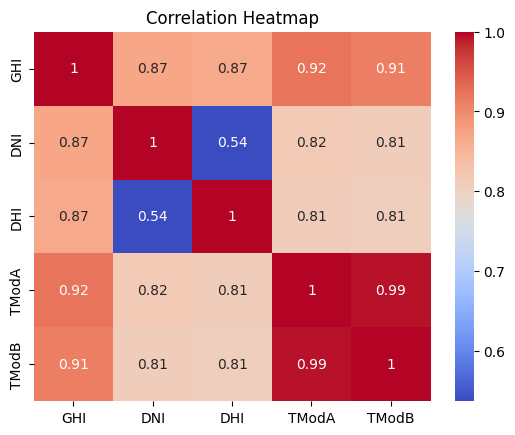

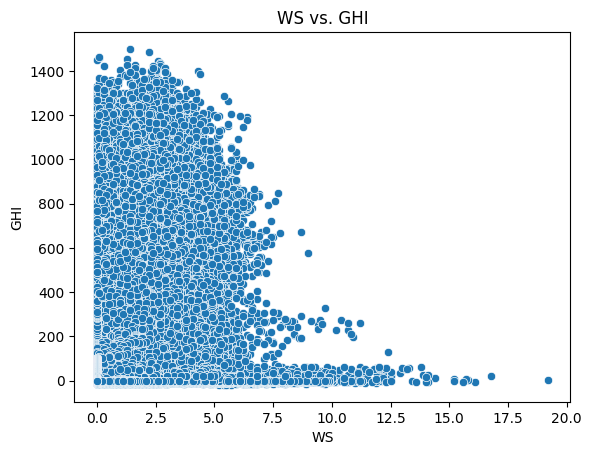

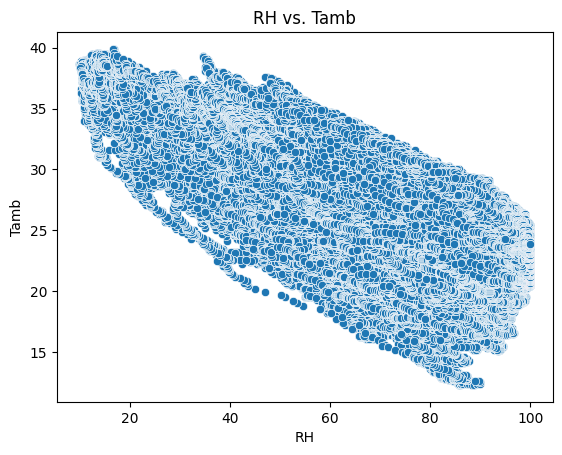

In [8]:
# Correlation heatmap
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots
sns.scatterplot(data=df, x='WS', y='GHI')
plt.title("WS vs. GHI")
plt.show()

sns.scatterplot(data=df, x='RH', y='Tamb')
plt.title("RH vs. Tamb")
plt.show()


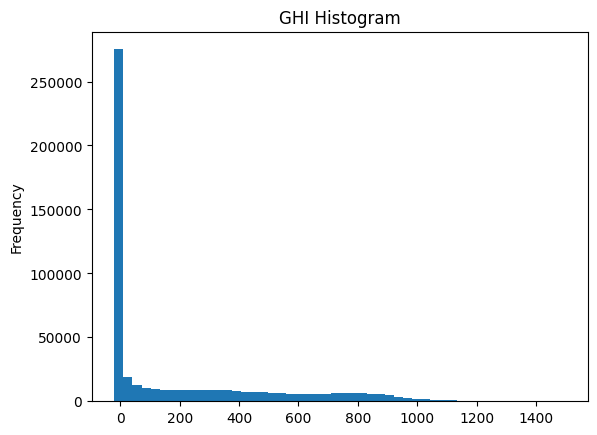

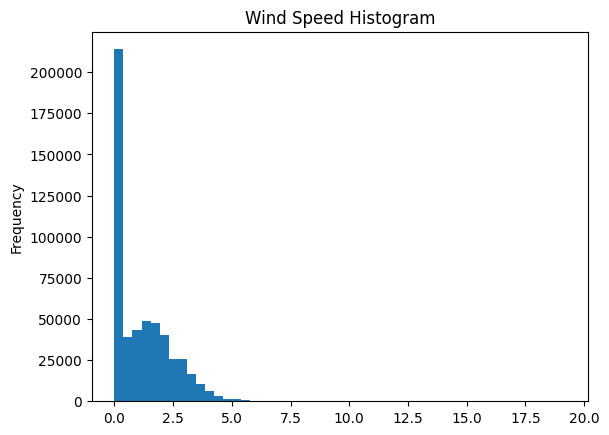

In [9]:
# Histogram
df['GHI'].plot(kind='hist', bins=50, title='GHI Histogram')
plt.show()

df['WS'].plot(kind='hist', bins=50, title='Wind Speed Histogram')
plt.show()

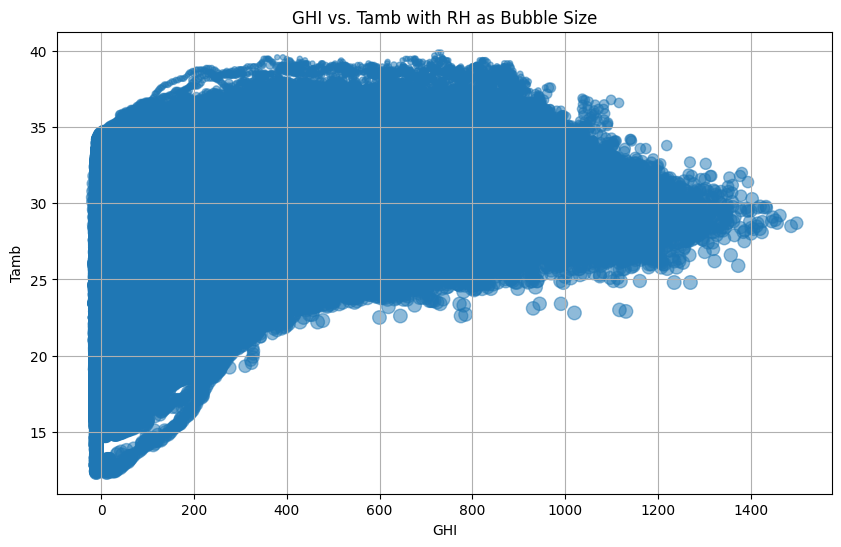

In [10]:
# Bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs. Tamb with RH as Bubble Size")
plt.grid(True)
plt.show()